Import Nessasary Libraries

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

Load The Dataset - I used the gdown command to download the dataset. You can skip this step, if you already have the dataset.


In [2]:
!gdown '1_dYczP8xxEY73jMDtTXMTVa9YeANu-89'

Downloading...
From: https://drive.google.com/uc?id=1_dYczP8xxEY73jMDtTXMTVa9YeANu-89
To: /content/data.xlsx
100% 5.61M/5.61M [00:00<00:00, 47.9MB/s]


In [3]:
windDataframe = pd.read_excel('data.xlsx')
# Dataset is now stored in a Pandas Dataframe

Dataset information

In [ ]:
windDataframe.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95115 entries, 0 to 95114
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       95115 non-null  int64  
 1   station_name               95115 non-null  object 
 2   station_id                 95115 non-null  int64  
 3   observation_date           95115 non-null  object 
 4   elevation                  95115 non-null  float64
 5   wind_direction_angle       95115 non-null  int64  
 6   wind_type                  95115 non-null  object 
 7   wind_speed_rate            95115 non-null  float64
 8   sky_cavok                  95115 non-null  object 
 9   visibility_distance        95115 non-null  float64
 10  air_temperature            95115 non-null  float64
 11  air_temperature_dew_point  95115 non-null  int64  
 12  GEOPOINT                   95115 non-null  object 
 13  humidity_percentage        95115 non-null  flo

View the first 5 rows of the dataset


In [ ]:
windDataframe.head(5)

,YEAR,station_name,station_id,observation_date,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,GEOPOINT,humidity_percentage
0,2022,KING ABDULAZIZ INTL,41024099999,2022-11-07T00:00:00+03:00,14.63,10,Light Breeze,5.40,Yes,9.9,27.0,18,"21.679564,39.156536",57.87
1,2022,TAIF,41036099999,2022-11-07T00:00:00+03:00,1477.67,270,Light Breeze,5.40,Yes,9.9,20.0,12,"21.483418,40.544334",60.00
2,2022,TAIF,41036099999,2022-11-07T00:00:00+03:00,1477.67,270,Light Breeze,5.40,No,10.0,19.5,12,"21.483418,40.544334",61.89
3,2022,KING ABDULAZIZ INTL,41024099999,2022-11-07T00:00:00+03:00,14.63,10,Light Breeze,5.40,No,10.0,27.1,17,"21.679564,39.156536",54.02
4,2022,KING ABDULAZIZ INTL,41024099999,2022-11-06T23:00:00+03:00,14.63,340,Light Breeze,7.56,Yes,9.9,28.0,17,"21.679564,39.156536",51.25


# **Preprocess the dataset**

First of all we need to remove Columns That Contain a Single Value (Unique value columns).


In [ ]:
# summarize the number of unique values in each column
print(windDataframe.nunique())

YEAR                             5
station_name                     3
station_id                       3
observation_date             37727
elevation                        3
wind_direction_angle            36
wind_type                       10
wind_speed_rate                 42
sky_cavok                        3
visibility_distance             56
air_temperature                409
air_temperature_dew_point       59
GEOPOINT                         3
humidity_percentage           4831
dtype: int64


No unique values. But we can remove year (Year can be computed within the observation date)

In [4]:
windDataframe = windDataframe.drop(columns=['YEAR','station_id','GEOPOINT'], axis=1)

##**Remove duplicates**

In [5]:
dups = windDataframe.duplicated()
# report if there are any duplicates
print(dups.any())

True


In [ ]:
# we have duplicate rows.. Need to remove them!

In [6]:
# delete duplicate rows
windDataframe.drop_duplicates(inplace=True)
windDataframe = windDataframe.reset_index(drop=True)

In [ ]:
windDataframe

,station_name,observation_date,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,humidity_percentage
0,KING ABDULAZIZ INTL,2022-11-07T00:00:00+03:00,14.63,10,Light Breeze,5.40,Yes,9.9,27.0,18,57.87
1,TAIF,2022-11-07T00:00:00+03:00,1477.67,270,Light Breeze,5.40,Yes,9.9,20.0,12,60.00
2,TAIF,2022-11-07T00:00:00+03:00,1477.67,270,Light Breeze,5.40,No,10.0,19.5,12,61.89
3,KING ABDULAZIZ INTL,2022-11-07T00:00:00+03:00,14.63,10,Light Breeze,5.40,No,10.0,27.1,17,54.02
4,KING ABDULAZIZ INTL,2022-11-06T23:00:00+03:00,14.63,340,Light Breeze,7.56,Yes,9.9,28.0,17,51.25
...,...,...,...,...,...,...,...,...,...,...,...
92494,KING ABDULAZIZ INTL,2018-01-01T05:00:00+03:00,14.63,360,Light Breeze,7.56,No,10.0,24.0,18,69.16
92495,KING ABDULAZIZ INTL,2018-01-01T04:00:00+03:00,14.63,350,Light Breeze,7.56,No,10.0,24.0,19,73.63
92496,KING ABDULAZIZ INTL,2018-01-01T03:00:00+03:00,14.63,10,Light Breeze,9.36,No,10.0,24.0,19,73.63
92497,KING ABDULAZIZ INTL,2018-01-01T03:00:00+03:00,14.63,10,Light Breeze,9.36,Missing,10.0,24.0,19,73.63


##**Check Null values**

In [ ]:
windDataframe.isnull().values.any()

False

In [ ]:
# No null values

## **Data change - ix "observation_date" Column , Convert it to DateTime data type**

Here the observation date column is in object form. We need to convert it into date time data type for fututre analysis.

In [7]:
windDataframe['observation_date'] =pd.to_datetime(windDataframe['observation_date'])
windDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92499 entries, 0 to 92498
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype                                
---  ------                     --------------  -----                                
 0   station_name               92499 non-null  object                               
 1   observation_date           92499 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   elevation                  92499 non-null  float64                              
 3   wind_direction_angle       92499 non-null  int64                                
 4   wind_type                  92499 non-null  object                               
 5   wind_speed_rate            92499 non-null  float64                              
 6   sky_cavok                  92499 non-null  object                               
 7   visibility_distance        92499 non-null  float64                              
 8   air_temperature           

Here I will extract the year, month, day.. etc columns from the observation column as it's very easy to deal with single values.

In [8]:
windDataframe["year"] = windDataframe['observation_date'].dt.year
windDataframe["month"] = windDataframe['observation_date'].dt.month
windDataframe["day"] = windDataframe['observation_date'].dt.day
windDataframe["time-h"] = windDataframe['observation_date'].dt.hour
windDataframe["time-m"] = windDataframe['observation_date'].dt.minute

In [9]:
# Now we don't need the observation date
windDataframe = windDataframe.drop(columns=['observation_date'], axis=1)

In [ ]:
windDataframe

,station_name,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,humidity_percentage,year,month,day,time-h,time-m
0,KING ABDULAZIZ INTL,14.63,10,Light Breeze,5.40,Yes,9.9,27.0,18,57.87,2022,11,7,0,0
1,TAIF,1477.67,270,Light Breeze,5.40,Yes,9.9,20.0,12,60.00,2022,11,7,0,0
2,TAIF,1477.67,270,Light Breeze,5.40,No,10.0,19.5,12,61.89,2022,11,7,0,0
3,KING ABDULAZIZ INTL,14.63,10,Light Breeze,5.40,No,10.0,27.1,17,54.02,2022,11,7,0,0
4,KING ABDULAZIZ INTL,14.63,340,Light Breeze,7.56,Yes,9.9,28.0,17,51.25,2022,11,6,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92494,KING ABDULAZIZ INTL,14.63,360,Light Breeze,7.56,No,10.0,24.0,18,69.16,2018,1,1,5,0
92495,KING ABDULAZIZ INTL,14.63,350,Light Breeze,7.56,No,10.0,24.0,19,73.63,2018,1,1,4,0
92496,KING ABDULAZIZ INTL,14.63,10,Light Breeze,9.36,No,10.0,24.0,19,73.63,2018,1,1,3,0
92497,KING ABDULAZIZ INTL,14.63,10,Light Breeze,9.36,Missing,10.0,24.0,19,73.63,2018,1,1,3,0


In [ ]:
windDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92499 entries, 0 to 92498
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   station_name               92499 non-null  object 
 1   elevation                  92499 non-null  float64
 2   wind_direction_angle       92499 non-null  int64  
 3   wind_type                  92499 non-null  object 
 4   wind_speed_rate            92499 non-null  float64
 5   sky_cavok                  92499 non-null  object 
 6   visibility_distance        92499 non-null  float64
 7   air_temperature            92499 non-null  float64
 8   air_temperature_dew_point  92499 non-null  int64  
 9   humidity_percentage        92499 non-null  float64
 10  year                       92499 non-null  int64  
 11  month                      92499 non-null  int64  
 12  day                        92499 non-null  int64  
 13  time-h                     92499 non-null  int

## **Handling Ouitliers - Box Plots**

Outliers are observations in a dataset that are unusually large or small and do not fit with the rest of the data. They can occur due to measurement errors, data entry errors, or natural variations in the data. Identifying and handling outliers is an important step in data preprocessing and analysis, as they can have a significant impact on the results of statistical analyses.

We can identify outliers using visualization techniques such as box plots and scatter plots to identify observations that fall outside the general pattern of the data.

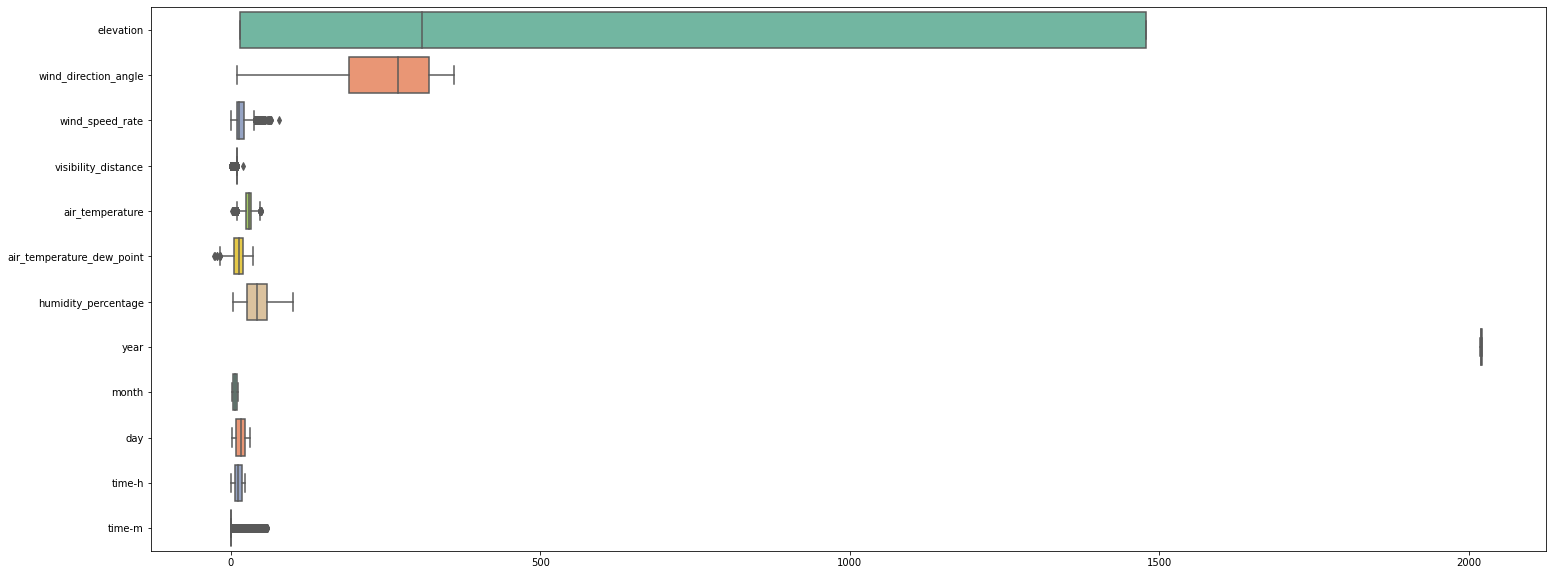

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(data=windDataframe, orient="h", palette="Set2",ax=ax );

We have outliers in wind speed rate


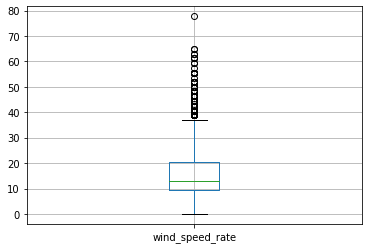

In [ ]:
windDataframe.boxplot(column=['wind_speed_rate']);

We can see an outliers above the 70 level. Let's remove it.

This will remove the outlier above 70 speed.

Before Shape: (92499, 15)
After Shape: (92498, 15)


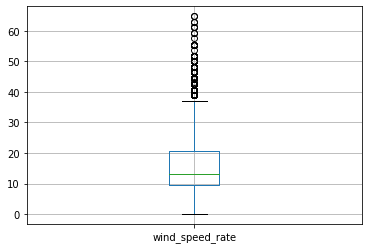

In [ ]:
print("Before Shape:",windDataframe.shape)

windDataframe = windDataframe[(windDataframe['wind_speed_rate']< 70)]
print("After Shape:",windDataframe.shape)

windDataframe.boxplot(column=['wind_speed_rate']);

## Replace new dataset with previous and resetting indexes
windDataframe=windDataframe.reset_index(drop=True)

###  **Histograms of the features** 

A histogram is a graphical representation of the distribution of a dataset. It is an estimate of the probability distribution of a continuous variable. To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not necessarily) of the same size.

A histogram consists of tabular frequencies, shown as adjacent rectangles, erected over discrete intervals (bins), with an area equal to the frequency of the observations in the interval. The height of a rectangle is also equal to the frequency density of the interval, i.e., the frequency divided by the width of the interval. The total area of the histogram is equal to the number of data.

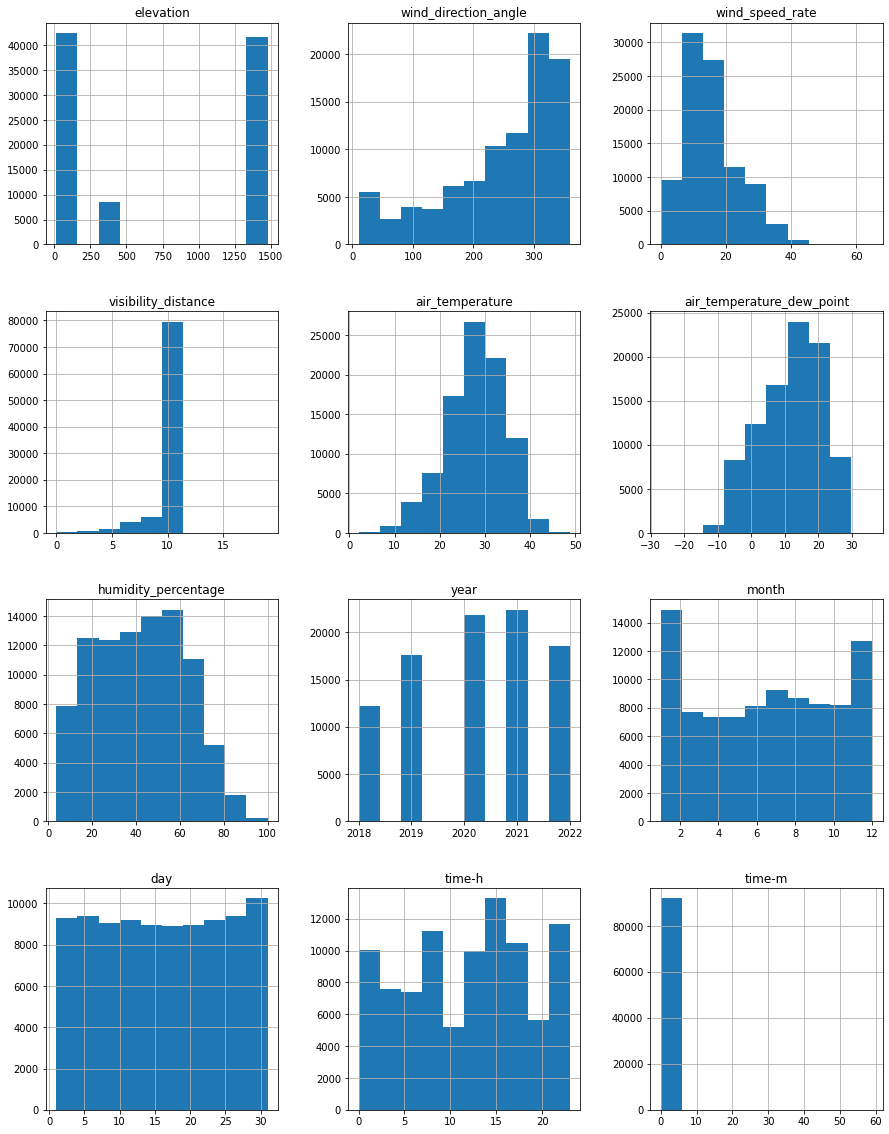

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
windDataframe.hist(ax = ax);

As you can see, time in minutes columns have only 0 data. So we can remove that

In [ ]:
windDataframe = windDataframe.drop(columns=['time-m'], axis=1)

##  **Data encoding** 

Data encoding is the process of converting data from one format or type into another format or type. The primary reason for data encoding is to prepare data for analysis or to make it compatible with the algorithm. 

In [ ]:
windDataframe.head(2)

,station_name,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,humidity_percentage,year,month,day,time-h
0,KING ABDULAZIZ INTL,14.63,10,Light Breeze,5.4,Yes,9.9,27.0,18,57.87,2022,11,7,0
1,TAIF,1477.67,270,Light Breeze,5.4,Yes,9.9,20.0,12,60.00,2022,11,7,0


In [ ]:
# We need to encode the wind type and sky cavok columns

In [ ]:
windDataframe['wind_type'].value_counts()

Light Breeze       37804
Gentle Breeze      27309
Moderate Breeze    17228
Fresh Breeze        6467
Light Air           2745
Strong Breeze        578
Calm                 326
Near Gale             37
Gale                   4
Name: wind_type, dtype: int64

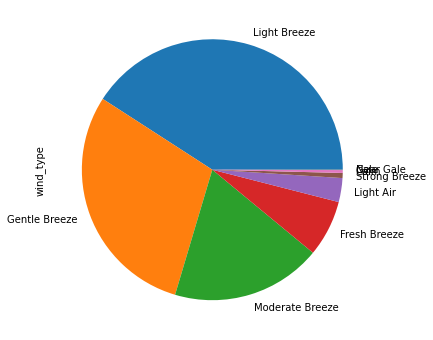

In [ ]:
windDataframe['wind_type'].value_counts().plot(kind='pie', figsize=(6,6));

In [ ]:
# There are 9 categories. Let's label encode those values

Here I use Label Encoding: It is used to convert categorical labels into numerical values. This is useful for handling categorical labels in supervised learning problems

In [ ]:
windDataframe['wind_type']=windDataframe['wind_type'].astype('category')
windDataframe['wind_type']=windDataframe['wind_type'].cat.codes

In [ ]:
windDataframe['sky_cavok'].value_counts()

No         61964
Yes        29504
Missing     1030
Name: sky_cavok, dtype: int64

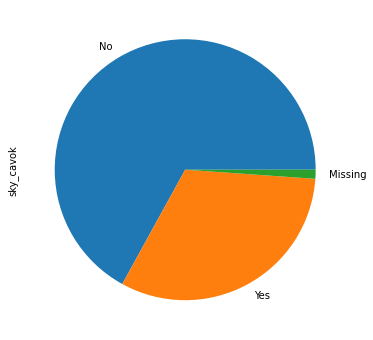

In [ ]:
windDataframe['sky_cavok'].value_counts().plot(kind='pie', figsize=(6,6));

In [ ]:
# We have 1030 missing values. Let's handle that first..

windDataframe = windDataframe[windDataframe["sky_cavok"].str.contains("Missing") == False]
windDataframe

,station_name,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,humidity_percentage,year,month,day,time-h
0,KING ABDULAZIZ INTL,14.63,10,5,5.40,Yes,9.9,27.0,18,57.87,2022,11,7,0
1,TAIF,1477.67,270,5,5.40,Yes,9.9,20.0,12,60.00,2022,11,7,0
2,TAIF,1477.67,270,5,5.40,No,10.0,19.5,12,61.89,2022,11,7,0
3,KING ABDULAZIZ INTL,14.63,10,5,5.40,No,10.0,27.1,17,54.02,2022,11,7,0
4,KING ABDULAZIZ INTL,14.63,340,5,7.56,Yes,9.9,28.0,17,51.25,2022,11,6,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92491,KING ABDULAZIZ INTL,14.63,30,5,11.16,No,10.0,23.4,18,71.71,2018,1,1,6
92492,KING ABDULAZIZ INTL,14.63,30,5,11.16,No,10.0,23.0,18,73.46,2018,1,1,6
92493,KING ABDULAZIZ INTL,14.63,360,5,7.56,No,10.0,24.0,18,69.16,2018,1,1,5
92494,KING ABDULAZIZ INTL,14.63,350,5,7.56,No,10.0,24.0,19,73.63,2018,1,1,4


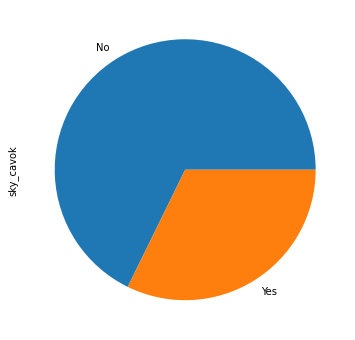

In [ ]:
windDataframe['sky_cavok'].value_counts().plot(kind='pie', figsize=(6,6));

In [ ]:
windDataframe['sky_cavok']=windDataframe['sky_cavok'].astype('category')
windDataframe['sky_cavok']=windDataframe['sky_cavok'].cat.codes

In [ ]:
windDataframe

,station_name,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,humidity_percentage,year,month,day,time-h
0,KING ABDULAZIZ INTL,14.63,10,5,5.40,1,9.9,27.0,18,57.87,2022,11,7,0
1,TAIF,1477.67,270,5,5.40,1,9.9,20.0,12,60.00,2022,11,7,0
2,TAIF,1477.67,270,5,5.40,0,10.0,19.5,12,61.89,2022,11,7,0
3,KING ABDULAZIZ INTL,14.63,10,5,5.40,0,10.0,27.1,17,54.02,2022,11,7,0
4,KING ABDULAZIZ INTL,14.63,340,5,7.56,1,9.9,28.0,17,51.25,2022,11,6,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92491,KING ABDULAZIZ INTL,14.63,30,5,11.16,0,10.0,23.4,18,71.71,2018,1,1,6
92492,KING ABDULAZIZ INTL,14.63,30,5,11.16,0,10.0,23.0,18,73.46,2018,1,1,6
92493,KING ABDULAZIZ INTL,14.63,360,5,7.56,0,10.0,24.0,18,69.16,2018,1,1,5
92494,KING ABDULAZIZ INTL,14.63,350,5,7.56,0,10.0,24.0,19,73.63,2018,1,1,4


# **Perform Feature Engineering** 

### **Identify significant and independent features using Correlation Matrix** 

A correlation matrix is a table showing correlation coefficients between multiple variables. Each cell in the table shows the correlation between two variables. The correlation coefficient ranges from -1 to 1, where -1 represents a perfect negative correlation, 1 represents a perfect positive correlation, and 0 represents no correlation.

A correlation matrix is used to summarize the association between multiple variables. It is a useful tool for identifying which variables are highly correlated with each other, and for detecting patterns in the data. For example, if two variables are strongly correlated, it suggests that they are likely measuring the same underlying construct or phenomenon.

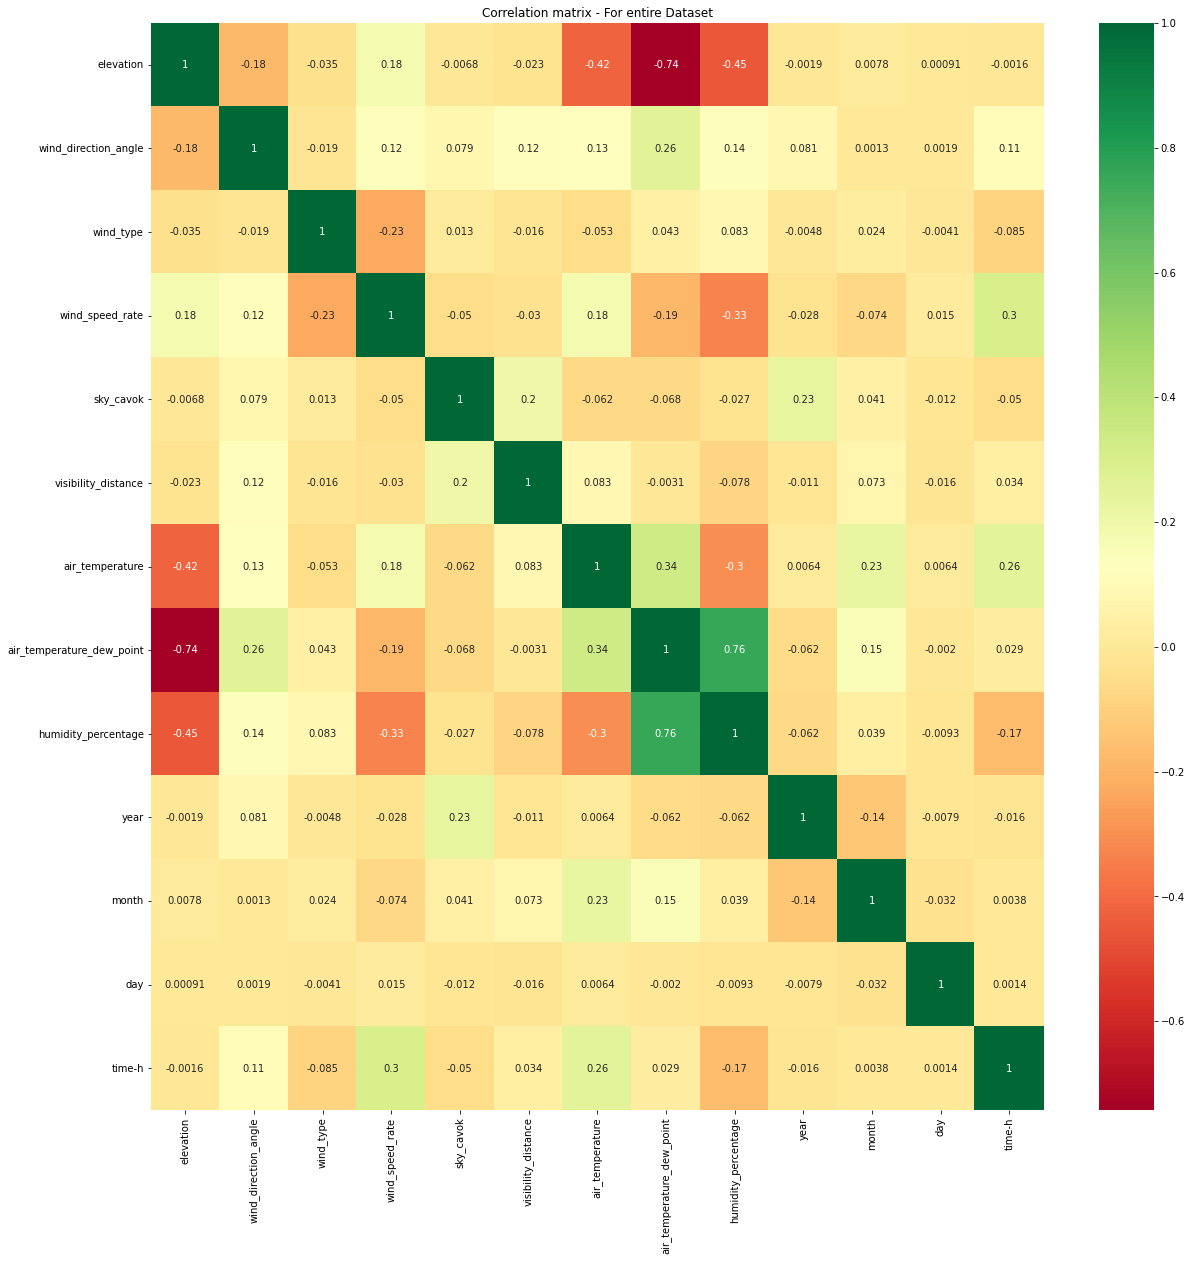

In [ ]:
correlation_mat = windDataframe.iloc[:,:15].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True, cmap="RdYlGn")
plt.title("Correlation matrix - For entire Dataset")
plt.show()

conclusions with this graph

1. There is a 0.26 relation with wind direction and air temperature dew point.
So we can say, wind direction affects the air temerature dew point.

2. Wind speed shows a high relation with humidity. So we can say humidity is affect to the wind speed.

3. Temperature and the humidity not showing a considerable relation with wind direction.

4. Also Wind speed and direction does not affects the visibility.



In [ ]:
# Is "Month" Has a relation with "Wind Speed"??

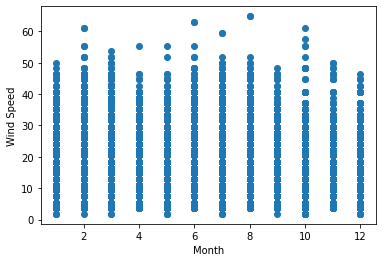

In [ ]:
month = windDataframe["month"]
wind  = windDataframe['wind_speed_rate']
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.scatter(month , wind)
plt.show()

form this Scatter we found that: in (2,6,8,10) months the wind speed is high. , then we can estimate that it has a relation!

In [ ]:
# Is tempreture has a relation with wind speed ?

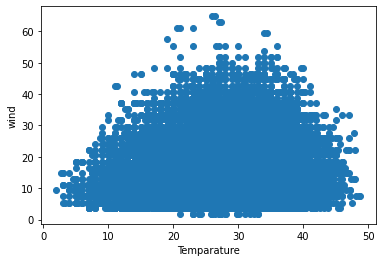

In [ ]:
plt.xlabel("Temparature")
plt.ylabel("wind")
plt.scatter(windDataframe['air_temperature'],wind)
plt.show()

As the graph shows, there is no any significant relation with the temparature and the wind.

All the relations

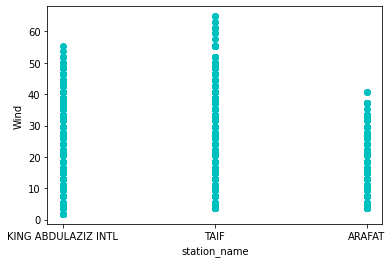

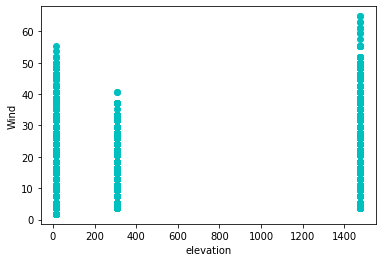

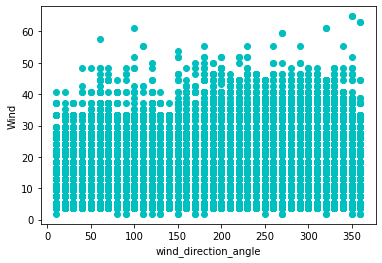

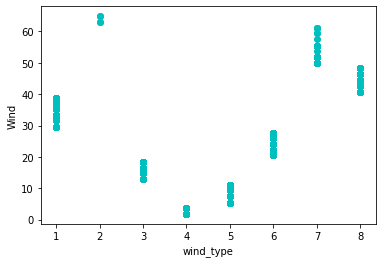

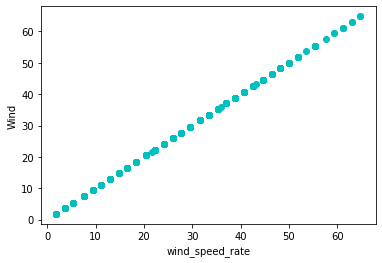

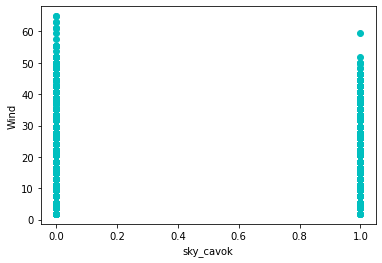

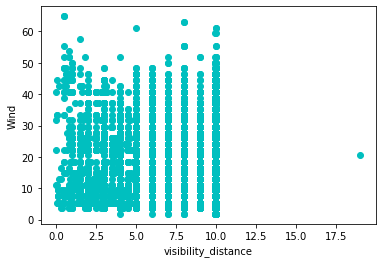

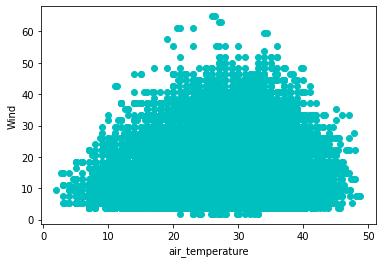

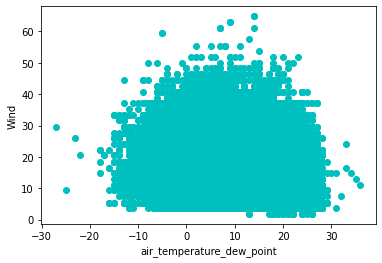

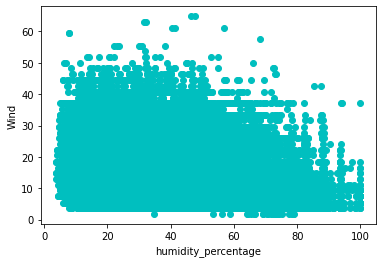

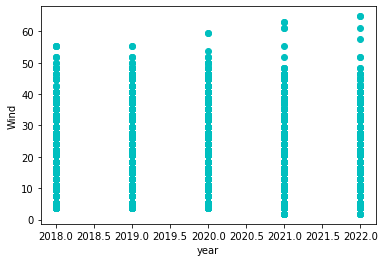

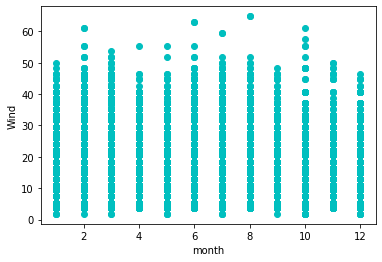

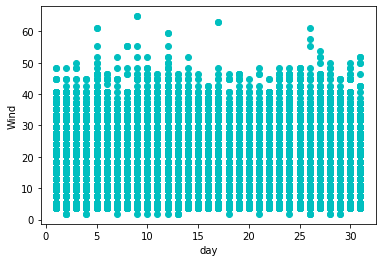

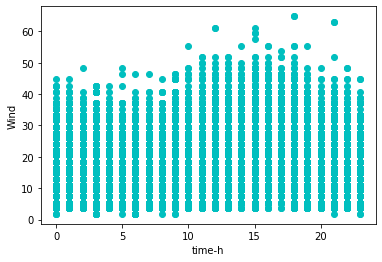

In [ ]:
for i in windDataframe.columns:
    plt.xlabel(i)
    plt.ylabel("Wind")
    plt.scatter(windDataframe[i] , windDataframe["wind_speed_rate"] ,color ="c")
    plt.show()

# **Analysis by station**

Let's check the 3 stations

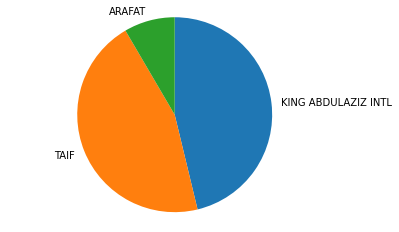

In [ ]:
# Count the frequency of each station name
station_counts = windDataframe['station_name'].value_counts()

# Plot the pie chart
plt.pie(station_counts, labels=station_counts.index, startangle=90, counterclock=False)
plt.axis('equal')
plt.show()

Sort the values according to the station

In [ ]:
windDataframe.sort_values(by='station_name', ascending=True)

,station_name,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,humidity_percentage,year,month,day,time-h
63108,ARAFAT,308.00,60,3,14.76,0,10.0,26.2,10,36.11,2019,12,20,0
13705,ARAFAT,308.00,240,3,12.96,0,4.0,30.8,13,33.71,2022,3,18,18
69009,ARAFAT,308.00,180,3,14.76,0,10.0,42.0,9,13.98,2019,9,12,12
13713,ARAFAT,308.00,240,3,14.76,0,4.0,34.0,13,28.13,2022,3,18,15
69000,ARAFAT,308.00,210,5,9.36,0,10.0,44.0,9,12.59,2019,9,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56036,TAIF,1477.67,270,1,33.48,0,10.0,28.4,11,33.93,2020,4,18,15
56037,TAIF,1477.67,220,1,33.48,0,10.0,29.0,9,28.66,2020,4,18,14
56039,TAIF,1477.67,250,6,25.92,0,10.0,29.0,9,28.66,2020,4,18,13
56026,TAIF,1477.67,290,1,29.52,0,10.0,25.0,13,47.28,2020,4,18,18


Now, let's split up the dataframe into 3 stations

In [10]:
for station in windDataframe['station_name'].unique():
    print(f'station_{station.lower().replace(" ", "_")}_df')
    exec(f'station_{station.lower().replace(" ", "_")}_df = windDataframe[windDataframe["station_name"] == "{station}"]')


station_king_abdulaziz_intl_df
station_taif_df
station_arafat_df


Now we have 3 station data separated in dataframes

In [ ]:
station_king_abdulaziz_intl_df

,station_name,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,humidity_percentage,year,month,day,time-h
0,KING ABDULAZIZ INTL,14.63,10,5,5.40,1,9.9,27.0,18,57.87,2022,11,7,0
3,KING ABDULAZIZ INTL,14.63,10,5,5.40,0,10.0,27.1,17,54.02,2022,11,7,0
4,KING ABDULAZIZ INTL,14.63,340,5,7.56,1,9.9,28.0,17,51.25,2022,11,6,23
5,KING ABDULAZIZ INTL,14.63,330,5,11.16,1,9.9,28.0,19,58.11,2022,11,6,22
7,KING ABDULAZIZ INTL,14.63,330,5,9.36,1,9.9,29.0,19,54.83,2022,11,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92491,KING ABDULAZIZ INTL,14.63,30,5,11.16,0,10.0,23.4,18,71.71,2018,1,1,6
92492,KING ABDULAZIZ INTL,14.63,30,5,11.16,0,10.0,23.0,18,73.46,2018,1,1,6
92493,KING ABDULAZIZ INTL,14.63,360,5,7.56,0,10.0,24.0,18,69.16,2018,1,1,5
92494,KING ABDULAZIZ INTL,14.63,350,5,7.56,0,10.0,24.0,19,73.63,2018,1,1,4


Let's remove the station column.

In [11]:
station_king_abdulaziz_intl_df = station_king_abdulaziz_intl_df.drop(columns=['station_name'], axis=1)
station_king_abdulaziz_intl_df = station_king_abdulaziz_intl_df.reset_index(drop=True)

station_taif_df = station_taif_df.drop(columns=['station_name'], axis=1)
station_taif_df = station_taif_df.reset_index(drop=True)

station_arafat_df = station_arafat_df.drop(columns=['station_name'], axis=1)
station_arafat_df = station_arafat_df.reset_index(drop=True)

In [ ]:
# samplae dataframe for abdulaziz station
station_king_abdulaziz_intl_df

,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,humidity_percentage,year,month,day,time-h
0,14.63,10,5,5.40,1,9.9,27.0,18,57.87,2022,11,7,0
1,14.63,10,5,5.40,0,10.0,27.1,17,54.02,2022,11,7,0
2,14.63,340,5,7.56,1,9.9,28.0,17,51.25,2022,11,6,23
3,14.63,330,5,11.16,1,9.9,28.0,19,58.11,2022,11,6,22
4,14.63,330,5,9.36,1,9.9,29.0,19,54.83,2022,11,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42280,14.63,30,5,11.16,0,10.0,23.4,18,71.71,2018,1,1,6
42281,14.63,30,5,11.16,0,10.0,23.0,18,73.46,2018,1,1,6
42282,14.63,360,5,7.56,0,10.0,24.0,18,69.16,2018,1,1,5
42283,14.63,350,5,7.56,0,10.0,24.0,19,73.63,2018,1,1,4


In [ ]:
station_king_abdulaziz_intl_df

,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_cavok,visibility_distance,air_temperature,air_temperature_dew_point,humidity_percentage,year,month,day,time-h
0,14.63,10,5,5.40,1,9.9,27.0,18,57.87,2022,11,7,0
1,14.63,10,5,5.40,0,10.0,27.1,17,54.02,2022,11,7,0
2,14.63,340,5,7.56,1,9.9,28.0,17,51.25,2022,11,6,23
3,14.63,330,5,11.16,1,9.9,28.0,19,58.11,2022,11,6,22
4,14.63,330,5,9.36,1,9.9,29.0,19,54.83,2022,11,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42280,14.63,30,5,11.16,0,10.0,23.4,18,71.71,2018,1,1,6
42281,14.63,30,5,11.16,0,10.0,23.0,18,73.46,2018,1,1,6
42282,14.63,360,5,7.56,0,10.0,24.0,18,69.16,2018,1,1,5
42283,14.63,350,5,7.56,0,10.0,24.0,19,73.63,2018,1,1,4


In [ ]:
station_king_abdulaziz_intl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42285 entries, 0 to 42284
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   elevation                  42285 non-null  float64
 1   wind_direction_angle       42285 non-null  int64  
 2   wind_type                  42285 non-null  int8   
 3   wind_speed_rate            42285 non-null  float64
 4   sky_cavok                  42285 non-null  int8   
 5   visibility_distance        42285 non-null  float64
 6   air_temperature            42285 non-null  float64
 7   air_temperature_dew_point  42285 non-null  int64  
 8   humidity_percentage        42285 non-null  float64
 9   year                       42285 non-null  int64  
 10  month                      42285 non-null  int64  
 11  day                        42285 non-null  int64  
 12  time-h                     42285 non-null  int64  
dtypes: float64(5), int64(6), int8(2)
memory usage:

# **Corelation Matrix for - king_abdulaziz_intl station**

In [ ]:
feature_set = station_king_abdulaziz_intl_df[['wind_direction_angle', 'wind_type', 'wind_speed_rate',
       'sky_cavok', 'visibility_distance', 'air_temperature',
       'air_temperature_dew_point', 'humidity_percentage', 'year', 'month',
       'day', 'time-h']].copy()

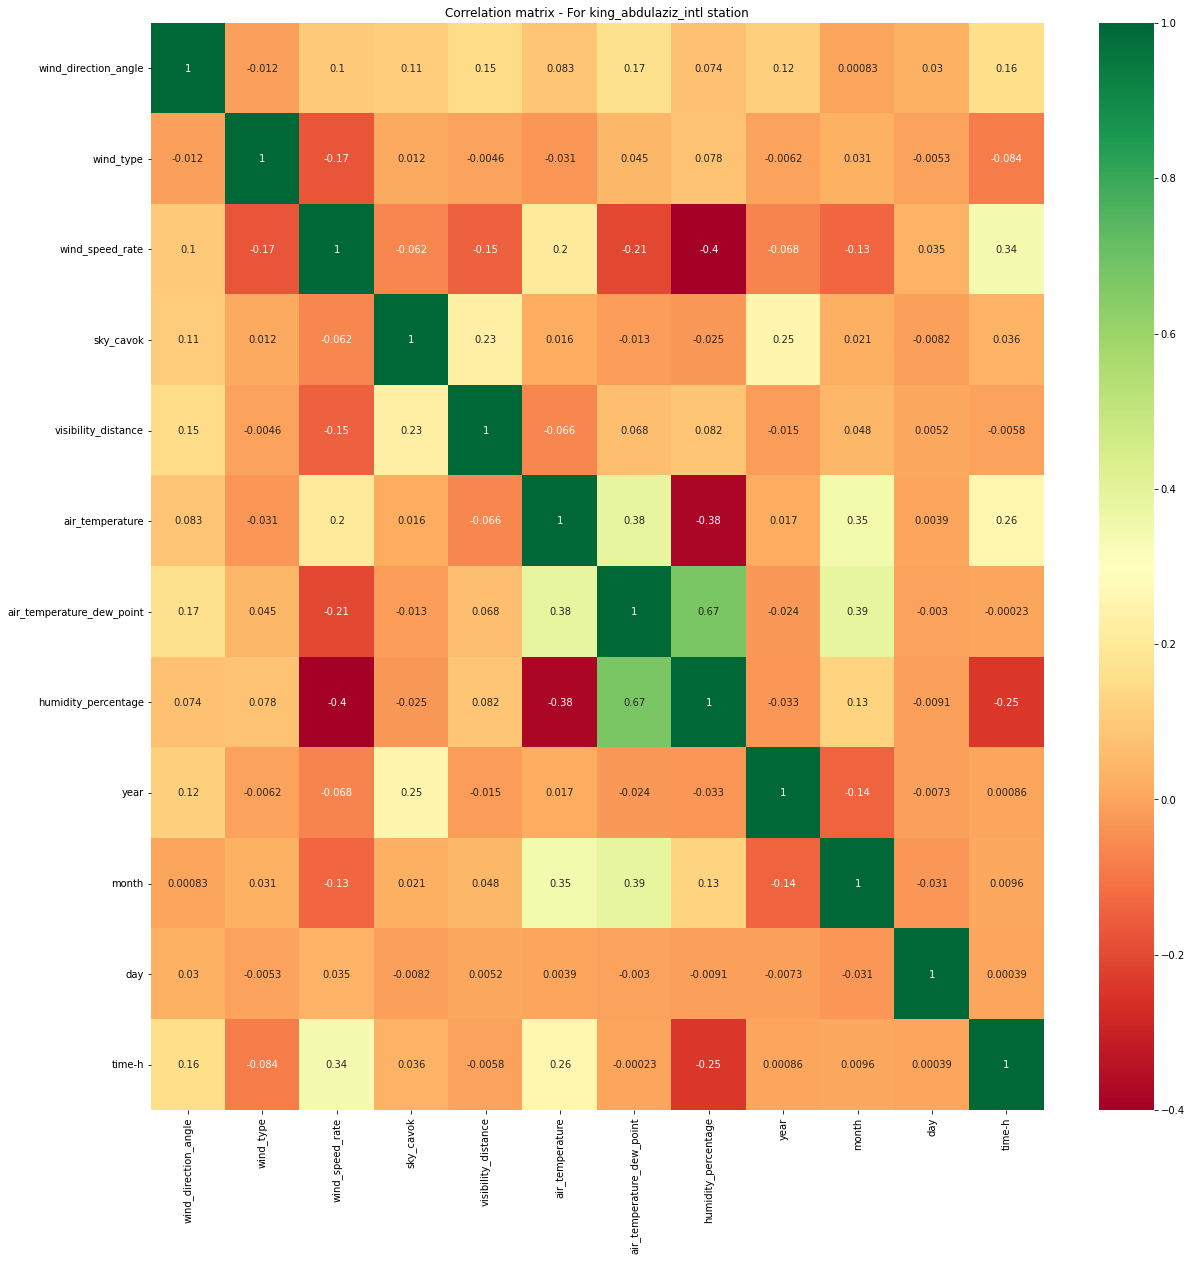

In [ ]:
correlation_mat = feature_set.iloc[:,:15].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True, cmap="RdYlGn")
plt.title("Correlation matrix - For king_abdulaziz_intl station")
plt.show()

# **Corelation Matrix for - taif station**

In [ ]:
feature_set = station_taif_df[['wind_direction_angle', 'wind_type', 'wind_speed_rate',
       'sky_cavok', 'visibility_distance', 'air_temperature',
       'air_temperature_dew_point', 'humidity_percentage', 'year', 'month',
       'day', 'time-h']].copy()

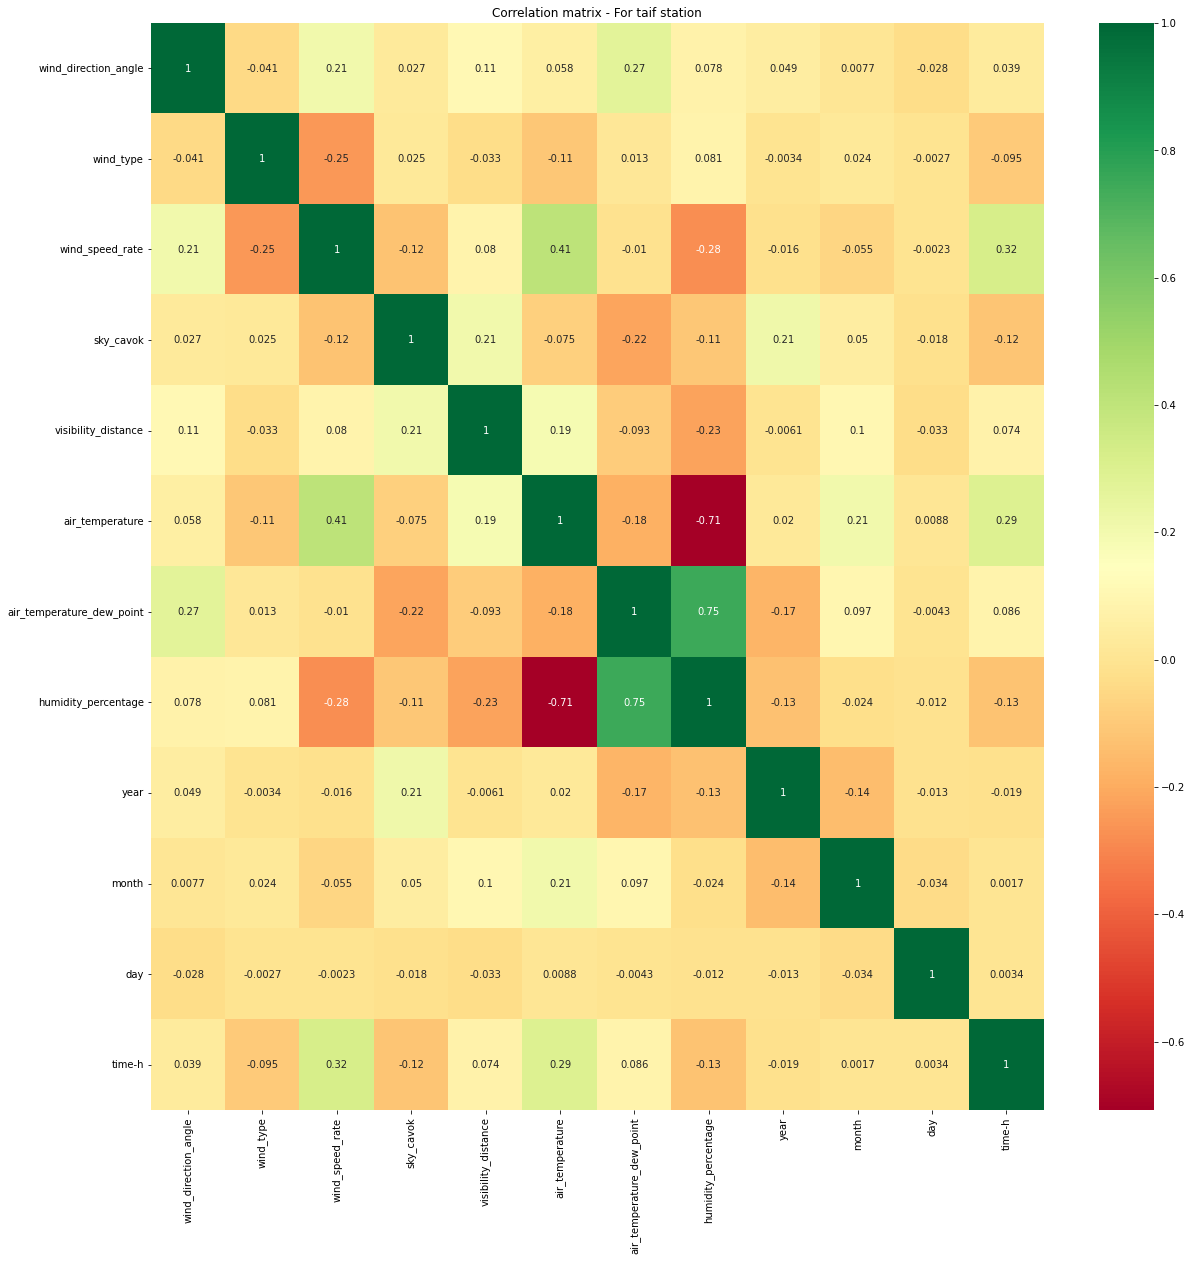

In [ ]:
correlation_mat = feature_set.iloc[:,:15].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True, cmap="RdYlGn")
plt.title("Correlation matrix - For taif station")
plt.show()

# **Corelation Matrix for - Arafat station**

In [ ]:
feature_set = station_arafat_df[['wind_direction_angle', 'wind_type', 'wind_speed_rate',
        'visibility_distance', 'air_temperature',
       'air_temperature_dew_point', 'humidity_percentage', 'year', 'month',
       'day', 'time-h']].copy()

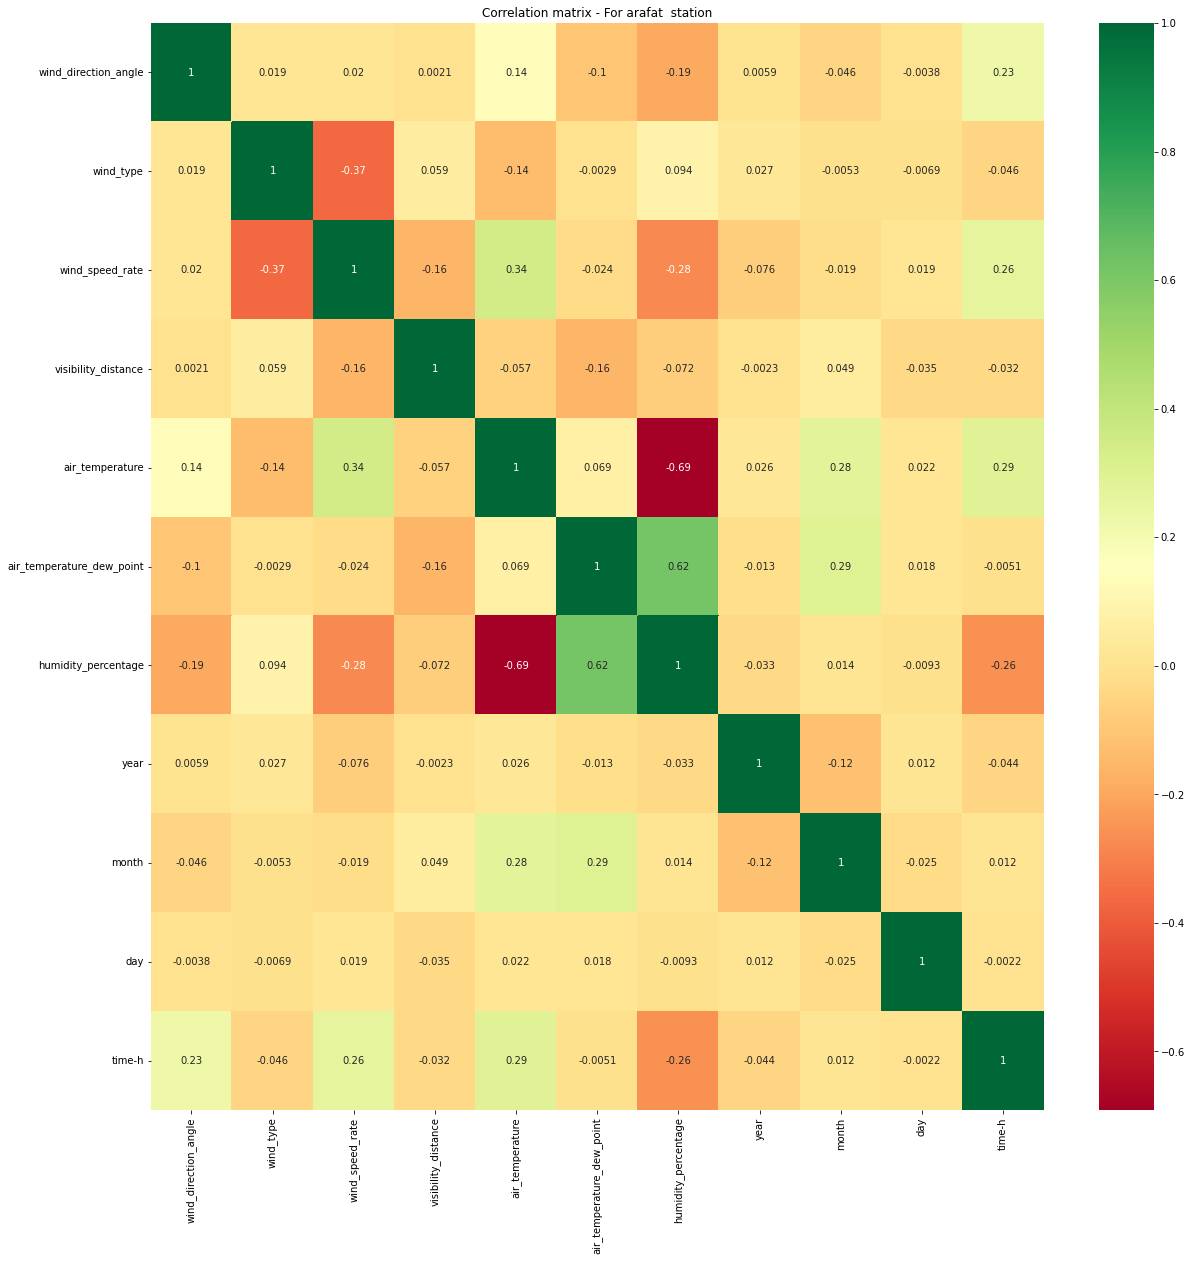

In [ ]:
correlation_mat = feature_set.iloc[:,:15].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True, cmap="RdYlGn")
plt.title("Correlation matrix - For arafat  station")
plt.show()

Now we need to train the model.  I will be predicting 
- Wind speed
-Wind direction ( angle )
-Temperature
-Visibility

for each station

# **king_abdulaziz_intl station Prediction** 

Let's define our feature set first. Here I will be using 

In [40]:
feature_set = station_king_abdulaziz_intl_df[['year', 'month', 'day', 'time-h','humidity_percentage','air_temperature_dew_point','sky_cavok','wind_type','elevation']].copy()

I have chosen these features as input data. We can predict the above mentioned areas usinf this.

In [ ]:
feature_set.head(2)

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation
0,2022,11,7,0,57.87,18,1,5,14.63
1,2022,11,7,0,54.02,17,0,5,14.63


**Wind Speed Prediction**

In [ ]:
# Here we define the features and the target for prediction.
y = station_king_abdulaziz_intl_df["wind_speed_rate"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_wind_speed_kab_station=reg.predict(test_x)

These are the features we used to predict wind speed

In [ ]:
test_x

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation
0,2018,5,18,18,37.49,18,0,3,14.63
1,2018,9,13,9,66.58,25,0,5,14.63
2,2020,7,16,2,58.58,21,1,5,14.63
3,2020,11,29,12,37.38,13,0,3,14.63
4,2019,3,29,3,68.97,17,0,3,14.63
...,...,...,...,...,...,...,...,...,...
8452,2022,8,19,7,52.52,22,0,5,14.63
8453,2021,4,19,22,38.21,16,0,5,14.63
8454,2019,12,18,19,23.10,5,0,1,14.63
8455,2021,8,5,17,44.71,23,1,3,14.63


We input these test set to the model and the  you can see the predicted wind speed by the model.

In [ ]:
pred_wind_speed_kab_station

array([21.78054853, 12.41848333, 10.47353437, ..., 21.73962049,
       17.55258036, 17.16758533])

In [ ]:
df2 = pd.DataFrame(pred_wind_speed_kab_station, columns=['predicted_wind_speed'])
df_combined = pd.concat([test_x, df2], axis=1)
df_combined

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed
0,2018,5,18,18,37.49,18,0,3,14.63,21.780549
1,2018,9,13,9,66.58,25,0,5,14.63,12.418483
2,2020,7,16,2,58.58,21,1,5,14.63,10.473534
3,2020,11,29,12,37.38,13,0,3,14.63,17.100257
4,2019,3,29,3,68.97,17,0,3,14.63,12.351569
...,...,...,...,...,...,...,...,...,...,...
8452,2022,8,19,7,52.52,22,0,5,14.63,12.640265
8453,2021,4,19,22,38.21,16,0,5,14.63,19.938993
8454,2019,12,18,19,23.10,5,0,1,14.63,21.739620
8455,2021,8,5,17,44.71,23,1,3,14.63,17.552580


You can see the predicted values in the right corner. So a given value set, year =2018, month =5, day=18, humidity percentage 37.49....etc the wind speed will be 21.78

### **5 Days Ahead Prediction**

In [33]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [34]:
feature_set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature_set,train_y)

pred_wind_speed_kab_station=reg.predict(future)
# Predicted wind speed for next 5 days
pred_wind_speed_kab_station

array([14.73091707, 14.75744543, 14.78397379, 14.81050215, 14.83703051,
       14.86355887])

Same like this, we can predict for other targets

**Wind Direction Prediction**

In [ ]:
# Here we define the features and the target for prediction. Here the target is wind_direction_angle
y = station_king_abdulaziz_intl_df["wind_direction_angle"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_wind_direction_kab_station=reg.predict(test_x)

In [ ]:
# Predicted wind direction
pred_wind_direction_kab_station

array([260.45668796, 251.90047919, 257.38262761, ..., 211.24053114,
       301.81715067, 320.4117119 ])

In [ ]:
# attaching the results to the previous dataframe
df2 = pd.DataFrame(pred_wind_direction_kab_station, columns=['predicted_wind_direction'])
df_combined2 = pd.concat([df_combined, df2], axis=1)
df_combined2

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed,predicted_wind_direction
0,2018,5,18,18,37.49,18,0,3,14.63,21.780549,260.456688
1,2018,9,13,9,66.58,25,0,5,14.63,12.418483,251.900479
2,2020,7,16,2,58.58,21,1,5,14.63,10.473534,257.382628
3,2020,11,29,12,37.38,13,0,3,14.63,17.100257,233.694839
4,2019,3,29,3,68.97,17,0,3,14.63,12.351569,235.247378
...,...,...,...,...,...,...,...,...,...,...,...
8452,2022,8,19,7,52.52,22,0,5,14.63,12.640265,268.396799
8453,2021,4,19,22,38.21,16,0,5,14.63,19.938993,284.557530
8454,2019,12,18,19,23.10,5,0,1,14.63,21.739620,211.240531
8455,2021,8,5,17,44.71,23,1,3,14.63,17.552580,301.817151


5 days ahead prediction

In [38]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [39]:
feature_set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature_set,train_y)

pred_wind_direction_kab_station=reg.predict(future)
# Predicted ind_direction_kab_station for next 5 days
pred_wind_direction_kab_station

array([285.93527531, 286.2975472 , 286.65981908, 287.02209097,
       287.38436286, 287.74663475])

**Temparature Prediction**

In [ ]:
# Here we define the features and the target for prediction. Here the target is air_temperature
y = station_king_abdulaziz_intl_df["air_temperature"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_air_temperature_kab_station=reg.predict(test_x)

In [ ]:
# Predicted temparature
pred_air_temperature_kab_station

array([34.64914383, 31.43966838, 30.54708422, ..., 28.00934711,
       37.24440199, 33.30914426])

In [ ]:
# attaching the results to the previous dataframe
df2 = pd.DataFrame(pred_air_temperature_kab_station, columns=['predicted_temparature'])
df_combined3 = pd.concat([df_combined2, df2], axis=1)
df_combined3

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed,predicted_wind_direction,predicted_temparature
0,2018,5,18,18,37.49,18,0,3,14.63,21.780549,260.456688,34.649144
1,2018,9,13,9,66.58,25,0,5,14.63,12.418483,251.900479,31.439668
2,2020,7,16,2,58.58,21,1,5,14.63,10.473534,257.382628,30.547084
3,2020,11,29,12,37.38,13,0,3,14.63,17.100257,233.694839,30.652650
4,2019,3,29,3,68.97,17,0,3,14.63,12.351569,235.247378,22.577228
...,...,...,...,...,...,...,...,...,...,...,...,...
8452,2022,8,19,7,52.52,22,0,5,14.63,12.640265,268.396799,33.796167
8453,2021,4,19,22,38.21,16,0,5,14.63,19.938993,284.557530,32.519883
8454,2019,12,18,19,23.10,5,0,1,14.63,21.739620,211.240531,28.009347
8455,2021,8,5,17,44.71,23,1,3,14.63,17.552580,301.817151,37.244402


5 days ahead prediction

In [42]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [43]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_air_temperature_kab_station=reg.predict(future)
# Predicted  air_temperature_kab_station for next 5 days
pred_air_temperature_kab_station

array([28.46475956, 28.47076071, 28.47676186, 28.48276301, 28.48876415,
       28.4947653 ])

**Visibility Prediction**

In [ ]:
# Here we define the features and the target for prediction. Here the target is visibility_distance
y = station_king_abdulaziz_intl_df["visibility_distance"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_visibility_kab_station=reg.predict(test_x)

In [ ]:
# Predicted wind direction
pred_visibility_kab_station

array([9.36926022, 9.55481911, 9.98527387, ..., 9.23732278, 9.85402643,
       9.84101632])

In [ ]:
# attaching the results to the previous dataframe
df2 = pd.DataFrame(pred_visibility_kab_station, columns=['predicted_visibility'])
df_combined4 = pd.concat([df_combined3, df2], axis=1)
df_combined4

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed,predicted_wind_direction,predicted_temparature,predicted_visibility
0,2018,5,18,18,37.49,18,0,3,14.63,21.780549,260.456688,34.649144,9.369260
1,2018,9,13,9,66.58,25,0,5,14.63,12.418483,251.900479,31.439668,9.554819
2,2020,7,16,2,58.58,21,1,5,14.63,10.473534,257.382628,30.547084,9.985274
3,2020,11,29,12,37.38,13,0,3,14.63,17.100257,233.694839,30.652650,9.258220
4,2019,3,29,3,68.97,17,0,3,14.63,12.351569,235.247378,22.577228,9.487527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,2022,8,19,7,52.52,22,0,5,14.63,12.640265,268.396799,33.796167,9.175257
8453,2021,4,19,22,38.21,16,0,5,14.63,19.938993,284.557530,32.519883,9.131315
8454,2019,12,18,19,23.10,5,0,1,14.63,21.739620,211.240531,28.009347,9.237323
8455,2021,8,5,17,44.71,23,1,3,14.63,17.552580,301.817151,37.244402,9.854026


5 Days ahead prediction

In [45]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [46]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_visibility_kab_station=reg.predict(future)
# Predicted visibility for next 5 days
pred_visibility_kab_station

array([9.43982681, 9.44103641, 9.44224602, 9.44345562, 9.44466523,
       9.44587483])

Now you can see all the prediction to king abdulaziz station. The other stations, we can use the same mechanism to predict the values.

# **Taif station Prediction**

In [53]:
feature_set = station_taif_df[['year', 'month', 'day', 'time-h','humidity_percentage','air_temperature_dew_point','sky_cavok','wind_type','elevation']].copy()

**Wind Speed Prediction**

In [ ]:
# Here we define the features and the target for prediction.
y = station_taif_df["wind_speed_rate"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_wind_speed_taif_station=reg.predict(test_x)

In [ ]:
# Predicted wind direction
pred_wind_speed_taif_station

array([23.23369997, 22.27152112, 15.53983908, ..., 19.89662669,
       18.68189587, 16.39515878])

In [ ]:
# attaching the results to a dataframe
df2 = pd.DataFrame(pred_wind_speed_taif_station, columns=['predicted_wind_speed'])
df_combined = pd.concat([test_x, df2], axis=1)
df_combined

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed
0,2018,5,5,21,48.96,15,0,3,1477.67,23.233700
1,2018,9,1,17,8.89,-2,0,3,1477.67,22.271521
2,2019,9,22,1,31.65,7,1,3,1477.67,15.539839
3,2020,10,22,6,17.65,-9,0,5,1477.67,11.347572
4,2021,5,13,3,28.29,4,0,5,1477.67,15.499681
...,...,...,...,...,...,...,...,...,...,...
8290,2020,4,16,4,26.44,-5,1,5,1477.67,11.071926
8291,2021,7,28,12,11.82,3,0,6,1477.67,19.384303
8292,2021,5,24,22,47.01,12,0,5,1477.67,19.896627
8293,2021,6,26,12,11.06,1,1,5,1477.67,18.681896


5 days ahead prediction

In [48]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [55]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_wind_speed_taif_station=reg.predict(future)
# Predicted wind speed for next 5 days
pred_wind_speed_taif_station

array([17.45866747, 17.45664728, 17.45462709, 17.4526069 , 17.45058671,
       17.44856653])

**Wind Direction Prediction**

In [ ]:
# Here we define the features and the target for prediction. Here the target is wind_direction_angle
y = station_taif_df["wind_direction_angle"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_wind_direction_taif_station=reg.predict(test_x)


In [ ]:
# Predicted wind direction
pred_wind_direction_taif_station

array([266.14467365, 193.95912893, 254.726666  , ..., 253.15795349,
       242.86486463, 249.8401465 ])

In [ ]:
# attaching the results to the previous dataframe
df2 = pd.DataFrame(pred_wind_direction_taif_station, columns=['predicted_wind_direction'])
df_combined2 = pd.concat([df_combined, df2], axis=1)
df_combined2

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed,predicted_wind_direction
0,2018,5,5,21,48.96,15,0,3,1477.67,23.233700,266.144674
1,2018,9,1,17,8.89,-2,0,3,1477.67,22.271521,193.959129
2,2019,9,22,1,31.65,7,1,3,1477.67,15.539839,254.726666
3,2020,10,22,6,17.65,-9,0,5,1477.67,11.347572,135.554726
4,2021,5,13,3,28.29,4,0,5,1477.67,15.499681,231.619216
...,...,...,...,...,...,...,...,...,...,...,...
8290,2020,4,16,4,26.44,-5,1,5,1477.67,11.071926,180.727785
8291,2021,7,28,12,11.82,3,0,6,1477.67,19.384303,235.087305
8292,2021,5,24,22,47.01,12,0,5,1477.67,19.896627,253.157953
8293,2021,6,26,12,11.06,1,1,5,1477.67,18.681896,242.864865


5 Dayas ahead prediction

In [51]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [57]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_wind_direction_taif_station=reg.predict(future)
# Predicted wind direction for next 5 days
pred_wind_direction_taif_station

array([234.24216628, 234.01496887, 233.78777147, 233.56057407,
       233.33337667, 233.10617926])

**Temparature Prediction**

In [ ]:
# Here we define the features and the target for prediction. Here the target is air_temperature
y = station_taif_df["air_temperature"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_air_temperature_taif_station=reg.predict(test_x)

In [ ]:
# Predicted temparature
pred_air_temperature_taif_station

array([26.28004932, 30.83156954, 26.42581252, ..., 25.07045091,
       30.44925608, 30.00256712])

In [ ]:
# attaching the results to the previous dataframe
df2 = pd.DataFrame(pred_air_temperature_taif_station, columns=['predicted_temparature'])
df_combined3 = pd.concat([df_combined2, df2], axis=1)
df_combined3

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed,predicted_wind_direction,predicted_temparature
0,2018,5,5,21,48.96,15,0,3,1477.67,23.233700,266.144674,26.280049
1,2018,9,1,17,8.89,-2,0,3,1477.67,22.271521,193.959129,30.831570
2,2019,9,22,1,31.65,7,1,3,1477.67,15.539839,254.726666,26.425813
3,2020,10,22,6,17.65,-9,0,5,1477.67,11.347572,135.554726,21.883875
4,2021,5,13,3,28.29,4,0,5,1477.67,15.499681,231.619216,25.641559
...,...,...,...,...,...,...,...,...,...,...,...,...
8290,2020,4,16,4,26.44,-5,1,5,1477.67,11.071926,180.727785,18.999632
8291,2021,7,28,12,11.82,3,0,6,1477.67,19.384303,235.087305,32.503790
8292,2021,5,24,22,47.01,12,0,5,1477.67,19.896627,253.157953,25.070451
8293,2021,6,26,12,11.06,1,1,5,1477.67,18.681896,242.864865,30.449256


5 Dayas ahead prediction

In [60]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [59]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_air_temperature_taif_station=reg.predict(future)
# Predicted air_temperature_taif_stationfor next 5 days
pred_air_temperature_taif_station

array([23.71383436, 23.72727869, 23.74072301, 23.75416734, 23.76761166,
       23.78105599])

**Visibility Prediction**

In [ ]:
# Here we define the features and the target for prediction. Here the target is visibility_distance
y = station_taif_df["visibility_distance"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_visibility_taif_station=reg.predict(test_x)

In [ ]:
# Predicted wind direction
pred_visibility_taif_station

array([ 9.54619876,  9.88411426, 10.10702522, ...,  9.14743216,
       10.19455113,  9.42704904])

In [ ]:
# attaching the results to the previous dataframe
df2 = pd.DataFrame(pred_visibility_taif_station, columns=['predicted_visibility'])
df_combined4 = pd.concat([df_combined3, df2], axis=1)
df_combined4

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed,predicted_wind_direction,predicted_temparature,predicted_visibility
0,2018,5,5,21,48.96,15,0,3,1477.67,23.233700,266.144674,26.280049,9.546199
1,2018,9,1,17,8.89,-2,0,3,1477.67,22.271521,193.959129,30.831570,9.884114
2,2019,9,22,1,31.65,7,1,3,1477.67,15.539839,254.726666,26.425813,10.107025
3,2020,10,22,6,17.65,-9,0,5,1477.67,11.347572,135.554726,21.883875,9.035935
4,2021,5,13,3,28.29,4,0,5,1477.67,15.499681,231.619216,25.641559,9.176087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,2020,4,16,4,26.44,-5,1,5,1477.67,11.071926,180.727785,18.999632,9.570917
8291,2021,7,28,12,11.82,3,0,6,1477.67,19.384303,235.087305,32.503790,9.562018
8292,2021,5,24,22,47.01,12,0,5,1477.67,19.896627,253.157953,25.070451,9.147432
8293,2021,6,26,12,11.06,1,1,5,1477.67,18.681896,242.864865,30.449256,10.194551


5 Days ahead predicition

In [61]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [63]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_visibility_taif_station=reg.predict(future)
# Predicted  visibility_taif_station for next 5 days
pred_visibility_taif_station

array([9.29792959, 9.29295586, 9.28798212, 9.28300838, 9.27803464,
       9.2730609 ])

We predicted to taif station as well.

# **Arafat station Prediction**

In [64]:
feature_set = station_arafat_df[['year', 'month', 'day', 'time-h','humidity_percentage','air_temperature_dew_point','sky_cavok','wind_type','elevation']].copy()

**Wind Speed Prediction**

In [ ]:
# Here we define the features and the target for prediction.
y = station_arafat_df["wind_speed_rate"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_wind_speed_afrat_station=reg.predict(test_x)

In [ ]:
pred_wind_speed_afrat_station

array([16.42896925,  8.98379198, 14.3253824 , ..., 14.49135516,
        4.07406624,  8.84495848])

In [ ]:
df2 = pd.DataFrame(pred_wind_speed_afrat_station, columns=['predicted_wind_speed'])
df_combined = pd.concat([test_x, df2], axis=1)
df_combined

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed
0,2021,4,29,18,45.92,20,0,1,308.0,16.428969
1,2021,3,8,12,31.13,13,0,5,308.0,8.983792
2,2018,8,4,18,27.70,16,0,3,308.0,14.325382
3,2022,1,4,21,40.60,8,0,4,308.0,9.785375
4,2021,1,2,18,50.62,18,0,5,308.0,9.026888
...,...,...,...,...,...,...,...,...,...,...
1538,2020,9,26,9,58.61,24,0,5,308.0,7.506212
1539,2022,2,13,12,28.34,9,0,5,308.0,8.305358
1540,2018,6,14,18,21.37,12,0,3,308.0,14.491355
1541,2022,1,30,0,63.28,13,0,5,308.0,4.074066


5 Dayas ahead prediction

In [67]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [66]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_wind_speed_afrat_station=reg.predict(future)
# Predicted wind speed for next 5 days
pred_wind_speed_afrat_station

array([8.94718769, 8.96018451, 8.97318133, 8.98617815, 8.99917498,
       9.0121718 ])

**Wind Direction Prediction**

In [ ]:
# Here we define the features and the target for prediction. Here the target is wind_direction_angle
y = station_arafat_df["wind_direction_angle"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_wind_direction_afrat_station=reg.predict(test_x)

In [ ]:
# Predicted wind direction
pred_wind_direction_afrat_station

array([234.03842989, 244.36658016, 247.46720593, ..., 253.70668988,
       193.46139477, 235.90327428])

In [ ]:
# attaching the results to the previous dataframe
df2 = pd.DataFrame(pred_wind_direction_afrat_station, columns=['predicted_wind_direction'])
df_combined2 = pd.concat([df_combined, df2], axis=1)
df_combined2

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed,predicted_wind_direction
0,2021,4,29,18,45.92,20,0,1,308.0,16.428969,234.038430
1,2021,3,8,12,31.13,13,0,5,308.0,8.983792,244.366580
2,2018,8,4,18,27.70,16,0,3,308.0,14.325382,247.467206
3,2022,1,4,21,40.60,8,0,4,308.0,9.785375,259.719422
4,2021,1,2,18,50.62,18,0,5,308.0,9.026888,249.942999
...,...,...,...,...,...,...,...,...,...,...,...
1538,2020,9,26,9,58.61,24,0,5,308.0,7.506212,211.770867
1539,2022,2,13,12,28.34,9,0,5,308.0,8.305358,247.431084
1540,2018,6,14,18,21.37,12,0,3,308.0,14.491355,253.706690
1541,2022,1,30,0,63.28,13,0,5,308.0,4.074066,193.461395


5 Days ahead prediction

In [68]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [70]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_wind_direction_afrat_station=reg.predict(future)
# Predicted wind direction for next 5 days
pred_wind_direction_afrat_station

array([238.73601237, 238.60146193, 238.46691149, 238.33236105,
       238.19781061, 238.06326016])

**Temparature Prediction**

In [ ]:
# Here we define the features and the target for prediction. Here the target is air_temperature
y = station_arafat_df["air_temperature"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_air_temperature_afrat_station=reg.predict(test_x)

In [ ]:
# Predicted temparature
pred_air_temperature_afrat_station

array([34.44451095, 33.61804083, 38.67884867, ..., 37.45616811,
       19.57447861, 36.69925366])

In [ ]:
# attaching the results to the previous dataframe
df2 = pd.DataFrame(pred_air_temperature_afrat_station, columns=['predicted_temparature'])
df_combined3 = pd.concat([df_combined2, df2], axis=1)
df_combined3

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed,predicted_wind_direction,predicted_temparature
0,2021,4,29,18,45.92,20,0,1,308.0,16.428969,234.038430,34.444511
1,2021,3,8,12,31.13,13,0,5,308.0,8.983792,244.366580,33.618041
2,2018,8,4,18,27.70,16,0,3,308.0,14.325382,247.467206,38.678849
3,2022,1,4,21,40.60,8,0,4,308.0,9.785375,259.719422,24.678339
4,2021,1,2,18,50.62,18,0,5,308.0,9.026888,249.942999,29.482902
...,...,...,...,...,...,...,...,...,...,...,...,...
1538,2020,9,26,9,58.61,24,0,5,308.0,7.506212,211.770867,32.703811
1539,2022,2,13,12,28.34,9,0,5,308.0,8.305358,247.431084,31.016053
1540,2018,6,14,18,21.37,12,0,3,308.0,14.491355,253.706690,37.456168
1541,2022,1,30,0,63.28,13,0,5,308.0,4.074066,193.461395,19.574479


5 dayas ahead prediction

In [73]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [72]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_air_temperature_afrat_station=reg.predict(future)
# Predicted  air_temperature_afrat_station speed for next 5 days
pred_air_temperature_afrat_station

array([31.57565701, 31.59237572, 31.60909444, 31.62581315, 31.64253186,
       31.65925057])

**Visibility Prediction**

In [ ]:
# Here we define the features and the target for prediction. Here the target is visibility_distance
y = station_arafat_df["visibility_distance"]

# here we split the dataset for test and train
train_x,test_x,train_y,test_y=train_test_split(feature_set,y,test_size=0.2,random_state=49)

# resetting indexes in the dataframe
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

# training the model
reg =LinearRegression()
reg.fit(train_x,train_y)

# prediction
pred_visibility_afrat_station=reg.predict(test_x)

In [ ]:
# Predicted wind direction
pred_visibility_afrat_station

array([9.15223787, 9.62762515, 9.5727517 , ..., 9.61071715, 9.62313247,
       9.64884207])

In [ ]:
# attaching the results to the previous dataframe
df2 = pd.DataFrame(pred_visibility_afrat_station, columns=['predicted_visibility'])
df_combined4 = pd.concat([df_combined3, df2], axis=1)
df_combined4

,year,month,day,time-h,humidity_percentage,air_temperature_dew_point,sky_cavok,wind_type,elevation,predicted_wind_speed,predicted_wind_direction,predicted_temparature,predicted_visibility
0,2021,4,29,18,45.92,20,0,1,308.0,16.428969,234.038430,34.444511,9.152238
1,2021,3,8,12,31.13,13,0,5,308.0,8.983792,244.366580,33.618041,9.627625
2,2018,8,4,18,27.70,16,0,3,308.0,14.325382,247.467206,38.678849,9.572752
3,2022,1,4,21,40.60,8,0,4,308.0,9.785375,259.719422,24.678339,9.753386
4,2021,1,2,18,50.62,18,0,5,308.0,9.026888,249.942999,29.482902,9.414199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,2020,9,26,9,58.61,24,0,5,308.0,7.506212,211.770867,32.703811,9.427551
1539,2022,2,13,12,28.34,9,0,5,308.0,8.305358,247.431084,31.016053,9.739054
1540,2018,6,14,18,21.37,12,0,3,308.0,14.491355,253.706690,37.456168,9.610717
1541,2022,1,30,0,63.28,13,0,5,308.0,4.074066,193.461395,19.574479,9.623132


5 Days ahead prediction

In [75]:
# define the period for which we want a prediction
future = list()
start_date = '2023-02-15'
end_date = '2023-02-20'

current_date = start_date
while current_date <= end_date:
    future.append([current_date])
    current_date = (pd.to_datetime(current_date) + pd.DateOffset(1)).strftime('%Y-%m-%d')

from pandas import DataFrame
from pandas import to_datetime
future = DataFrame(future)
future.columns = ['FutureDate']
future['FutureDate']= to_datetime(future['FutureDate'])

future["year"] = future['FutureDate'].dt.year
future["month"] = future['FutureDate'].dt.month
future["day"] = future['FutureDate'].dt.day
future = future.drop(columns=['FutureDate'], axis=1)
future

,year,month,day
0,2023,2,15
1,2023,2,16
2,2023,2,17
3,2023,2,18
4,2023,2,19
5,2023,2,20


In [76]:
feature__set = train_x[['year', 'month', 'day']].copy()

# training the model
reg =LinearRegression()
reg.fit(feature__set,train_y)

pred_visibility_afrat_station=reg.predict(future)
# Predicted wind speed for next 5 days
pred_visibility_afrat_station

array([9.56905977, 9.5666916 , 9.56432343, 9.56195526, 9.55958709,
       9.55721892])